# Data exploration

The data can be found in the following link: https://drive.google.com/drive/folders/1kz7Dkq5jQ8WR82xBITyQ7S4vUgBFNsDn 

From "Hierarchical User Profiling for E-commerce Recommender Systems" by Gu, Yulong and Ding, Zhuoye and Wang, Shuaiqiang and Yin, Dawei pubished in Proceedings of the 13th International Conference on Web Search and Data Mining, 2020. 

## Data description 
Each line is a sequence of a user’s micro behaviors in a session. 

Each micro-behavior is in the format of "**sku + behavior_type + category + time_interval + dwell_time**", where "SKU" is id of the product, "behavior_type" is the type of micro-behavior, "category“ is the leaf category of the product, time_interval is the time interval between two consecutive micro behiaviors, dwell_time is the dwell time in each product.  

For example, "1993092+7+870+22+27" is a micro-behavior, which means that a user read the specification of product "1993092" (in the leaf category "870"). The time interval between this micro behavior and next micro behavior is 22 seconds. The user spends 27 seconds in this product.

In [1]:
! conda activate dm
# importing libraries
import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

import mglearn
print("mglearn version:", mglearn.__version__)

import matplotlib.pyplot as plt
from pathlib import Path

Python version: 3.10.4 | packaged by conda-forge | (main, Mar 30 2022, 08:38:02) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.4.2
matplotlib version: 3.5.2
NumPy version: 1.22.4
SciPy version: 1.8.1
IPython version: 8.3.0
scikit-learn version: 1.1.1
mglearn version: 0.1.9


## Data pre-processing

In [2]:
# Data is not very usable the original way. We are going to separate first by users with their micro behavior 
data = open("dataset/computers_sample", "r") # TODO change the sample for our selected data!!!!

user_idx = 0
behavior_step = 0
data_array = []

for line in data:
    for micro in line.split(" "): 
        line = str(user_idx) + "+" + str(behavior_step) + "+" + micro;
        line = line.strip("\n ")
        data_array.append(line)
        behavior_step += 1
    behavior_step = 0
    user_idx += 1

In [13]:
# we will make our data more easy to understand 
data_pf = pd.DataFrame(data_array)
data_pf.columns = ["data"]
data_pf = data_pf.data.str.split(pat='+',expand=True)
data_pf.columns = ["session_id",  "seq", "sku", "behavior_type", "category", "time_interval", "dwell_time"]
data_pf

# save it
filepath = Path('data.csv')  
data_pf.to_csv(filepath) 
print("--> Saved data")
data_pf

--> Saved data


,session_id,seq,sku,behavior_type,category,time_interval,dwell_time
0,0,0,2885143,5,683,9,4
1,0,1,3282626,5,679,3,52
2,0,2,3282626,7,679,49,52
3,0,3,3203662,5,679,191,10
4,0,4,1836048,5,681,122,9
...,...,...,...,...,...,...,...
437022,15764,15,2168838,5,688,12,6
437023,15764,16,1255209,5,688,242,6
437024,15764,17,696804,5,728,3,14
437025,15764,18,696804,7,728,53,14


We added two new columns in our data: **user_id** will tell us that that micro behavior was conducted by certain user, meanwhile **seq** refers to the number the behavior has on the sequence. 

## Data exploration

In [4]:
# categories 
data_pf.groupby("category").count()["sku"]

category
10011      25
1009        3
1047     1413
1048      207
1049     6351
         ... 
7374      993
7375       38
808        69
826      3441
983       224
Name: sku, Length: 90, dtype: int64

In [5]:
data_pf.category.unique()

array(['683', '679', '681', '680', '11762', '678', '11303', '691', '687',
       '673', '672', '690', '1105', '688', '720', '4840', '728', '7371',
       '736', '674', '717', '5008', '701', '682', '689', '2603', '5010',
       '722', '694', '4837', '4839', '7372', '808', '2694', '12376',
       '1449', '5009', '730', '675', '684', '700', '826', '1098', '12805',
       '12804', '13279', '1049', '731', '1047', '5146', '12803', '12370',
       '693', '12799', '1050', '6864', '12798', '719', '1048', '723',
       '2601', '12802', '12801', '11304', '7374', '702', '692', '695',
       '4838', '733', '724', '718', '727', '7375', '725', '698', '5011',
       '7373', '696', '11221', '721', '983', '1051', '1009', '10011',
       '10969', '726', '697', '1229', '732'], dtype=object)

Text(0, 0.5, 'Frequency')

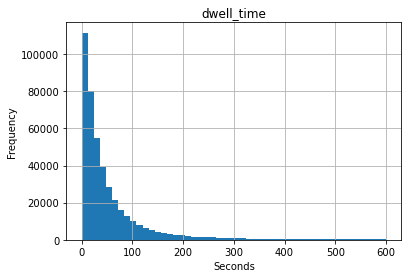

In [6]:
# dwell_time
# dt = data_pf.groupby("dwell_time").count() # see exactly the counts
data_num = data_pf.astype({"dwell_time": int}, errors='raise') 
data_num.hist(column='dwell_time', bins=50, range=(0,600))
plt.xlabel('Seconds')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

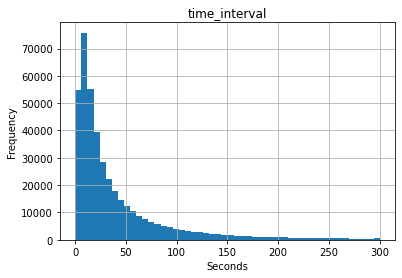

In [7]:
# time_interval
# dt = data_pf.groupby("dwell_time").count() # see exactly the counts
data_num = data_pf.astype({"time_interval": int}, errors='raise') 
data_num.hist(column='time_interval', bins=50, range=(0,300))
plt.xlabel('Seconds')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

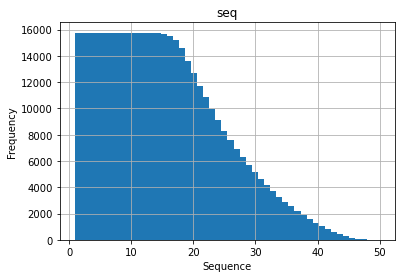

In [8]:
# sequence
# dt = data_pf.groupby("dwell_time").count() # see exactly the counts
data_num = data_pf.astype({"seq": int}, errors='raise') 
data_num.hist(column='seq', bins=50, range=(1,50))
plt.xlabel('Sequence')
plt.ylabel('Frequency')

We can see that most people will spend less than 100 seconds looking at a product, with most of them spending less than 50. There are a few outliers that thake more than 400 seconds.

Text(0, 0.5, 'Frequency')

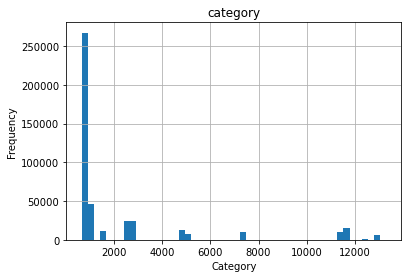

In [9]:
# categories
# dt = data_pf.groupby("category").count() # see exactly the counts
data_num = data_pf.astype({"category": int}, errors='raise') 
data_num.hist(column='category', bins=50)
plt.xlabel('Category')
plt.ylabel('Frequency')

In [10]:
data_pf['category'].astype({"category": str}, errors='raise').describe()

count     437027
unique        90
top          672
freq       73189
Name: category, dtype: object

In [11]:
# behaviors 
# First, let's check the categories 
data_pf.groupby("behavior_type").count()["sku"]

behavior_type
1       9068
10       893
2      24066
3       2437
4      18512
5     250913
6      30630
7      64008
8      13686
9      22814
Name: sku, dtype: int64

We can check the behavior description from the original source. 

| behavior_type | Micro behaviors      | Description                                  |
| ------------- | -------------------- | -------------------------------------------- |
| 1             | Home2Product         | Browse the product from the homepage         |
| 2             | ShopList2Product     | Browse the product from the category page    |
| 3             | Sale2Product         | Browse the product from the sale page        |
| 4             | Cart2Product         | Browse the product from the carted page      |
| 5             | SearchList2Product   | Browse the product from the searched results |
| 6             | Detail_comments      | Read the comments of the product             |
| 7             | Detail_specification | Read the specification of the product        |
| 8             | Detail_bottom        | Read the bottom of page of the product       |
| 9             | Cart                 | Add the product to the shopping cart         |
| 10            | Order                | Make an order                                |

There we can see that most people do the "Browse the product from the searched results". 

In [12]:
# products 
data_pf.groupby("sku").count()

,user_id,seq,behavior_type,category,time_interval,dwell_time
sku,,,,,,
10000019561,1,1,1,1,1,1
10000034958,1,1,1,1,1,1
10000037793,1,1,1,1,1,1
10000045198,2,2,2,2,2,2
10000059263,2,2,2,2,2,2
...,...,...,...,...,...,...
999305,1,1,1,1,1,1
999545,2,2,2,2,2,2
999590,11,11,11,11,11,11
